# **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import scikitplot as skplt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay,roc_auc_score

In [2]:
pip install pandas scikit-learn xgboost


Note: you may need to restart the kernel to use updated packages.


In [3]:
 !pip install seaborn --upgrade

In [4]:
pip install -U jupyterlab ipywidgets jupyterlab-widgets

Note: you may need to restart the kernel to use updated packages.


In [5]:
#!pip install ydata-profiling

In [6]:
!pip install imbalanced-learn

In [7]:
pip install pydantic-settings


Note: you may need to restart the kernel to use updated packages.


# **Loading Dataset**

In [8]:
#Read Dataset
df = pd.read_csv('dropout.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# **Data Visualization**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [10]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [11]:
df.size

163688

# **Data Profiling**

In [12]:
pip install -U ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [13]:
#from ydata_profiling import ProfileReport

# Create the profile report
#prof = ProfileReport(df)

# Save the report to an HTML file
#prof.to_file(output_file='DropOut_report.html')

# **SMOTE(Synthetic Minority Oversampling Technique) for balancing dataset**

In [14]:
y = df['Target']
x = df.drop(columns = 'Target')
y.value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [15]:
from imblearn.over_sampling import SMOTE

# create a smote object
smote=SMOTE(sampling_strategy='auto',random_state=42)
# Apply smote on x y
x_resampled,y_resampled=smote.fit_resample(x,y)
print(type(x_resampled))
print(type(y_resampled))

#combine df
resampled_df=pd.concat([x_resampled,y_resampled],axis=1)

resampled_df

resampled_df.info()


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6627 entries, 0 to 6626
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  6627 non-null   int64  
 1   Application mode                                6627 non-null   int64  
 2   Application order                               6627 non-null   int64  
 3   Course                                          6627 non-null   int64  
 4   Daytime/evening attendance                      6627 non-null   int64  
 5   Previous qualification                          6627 non-null   int64  
 6   Previous qualification (grade)                  6627 non-null   float64
 7   Nationality                                     6627 non-null   int64  
 8   Mother's qualification                      

In [16]:
resampled_df.shape

(6627, 37)

# Target Encoding #


In [17]:
resampled_df['Target'] = LabelEncoder().fit_transform(resampled_df['Target'])
resampled_df.head()
resampled_df['Target'].value_counts()

Target
0    2209
2    2209
1    2209
Name: count, dtype: int64

# Plotting Graphs #

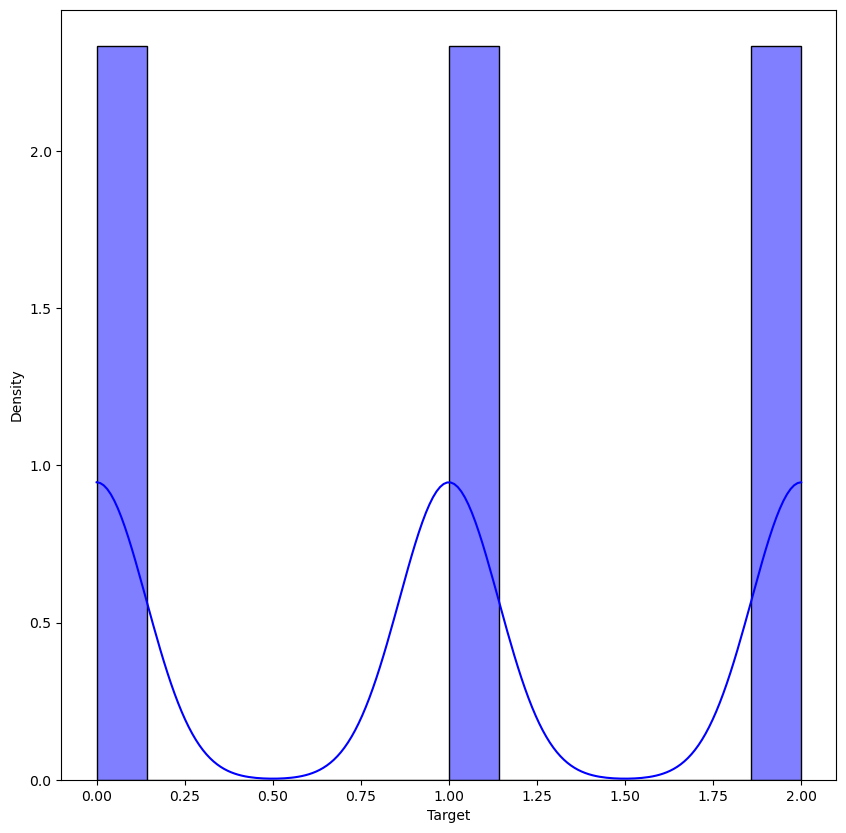

In [18]:
# Ensure inline plotting in Jupyter notebooks
%matplotlib inline


# Convert infinity values to NaN
resampled_df['Target'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (optional, depending on your data handling needs)
resampled_df.dropna(subset=['Target'], inplace=True)

# Plotting
plt.figure(figsize=(10, 10))
sns.histplot(resampled_df['Target'], color="Blue", kde=True, stat='density')
#plt.savefig('resampled_target_distribution.png', bbox_inches='tight')
plt.show()


Text(0.5, 1.0, 'Target')

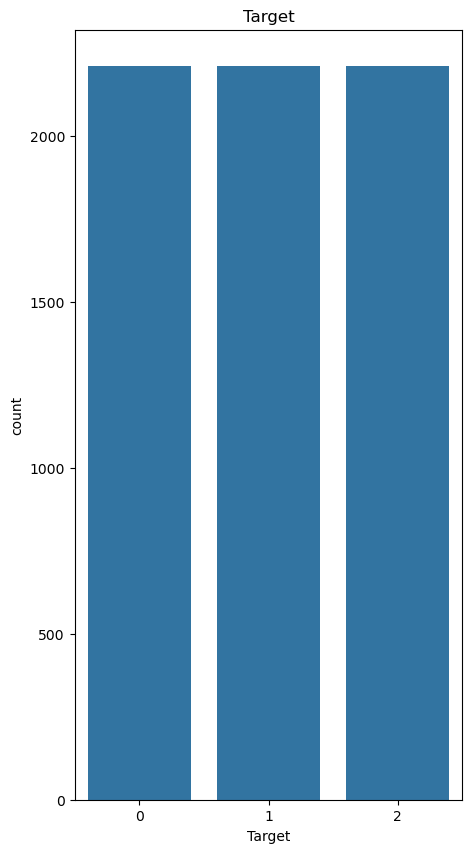

In [19]:
plt.figure(figsize=(5, 10))
sns.countplot(data = resampled_df, x="Target").set_title('Target')
#plt.savefig('target_countplot.png')

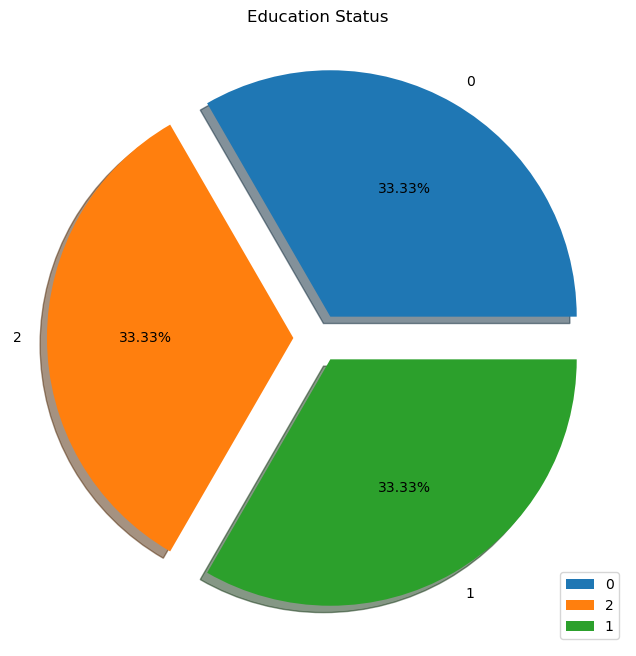

In [20]:
target_counts = resampled_df['Target'].value_counts()
labels = target_counts.index
explode = [0.1] * len(target_counts)

# Plotting
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(target_counts, labels=labels, explode=explode, autopct='%1.2f%%', shadow=True)
plt.legend(loc='lower right')

# Save the plot as a PNG file
#plt.savefig('education_status_pie_chart.png', bbox_inches='tight')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12816\1988005544.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resampled_df.iloc[:, i], color='blue')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12816\1988005544.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resampled_df.iloc[:, i], color='b

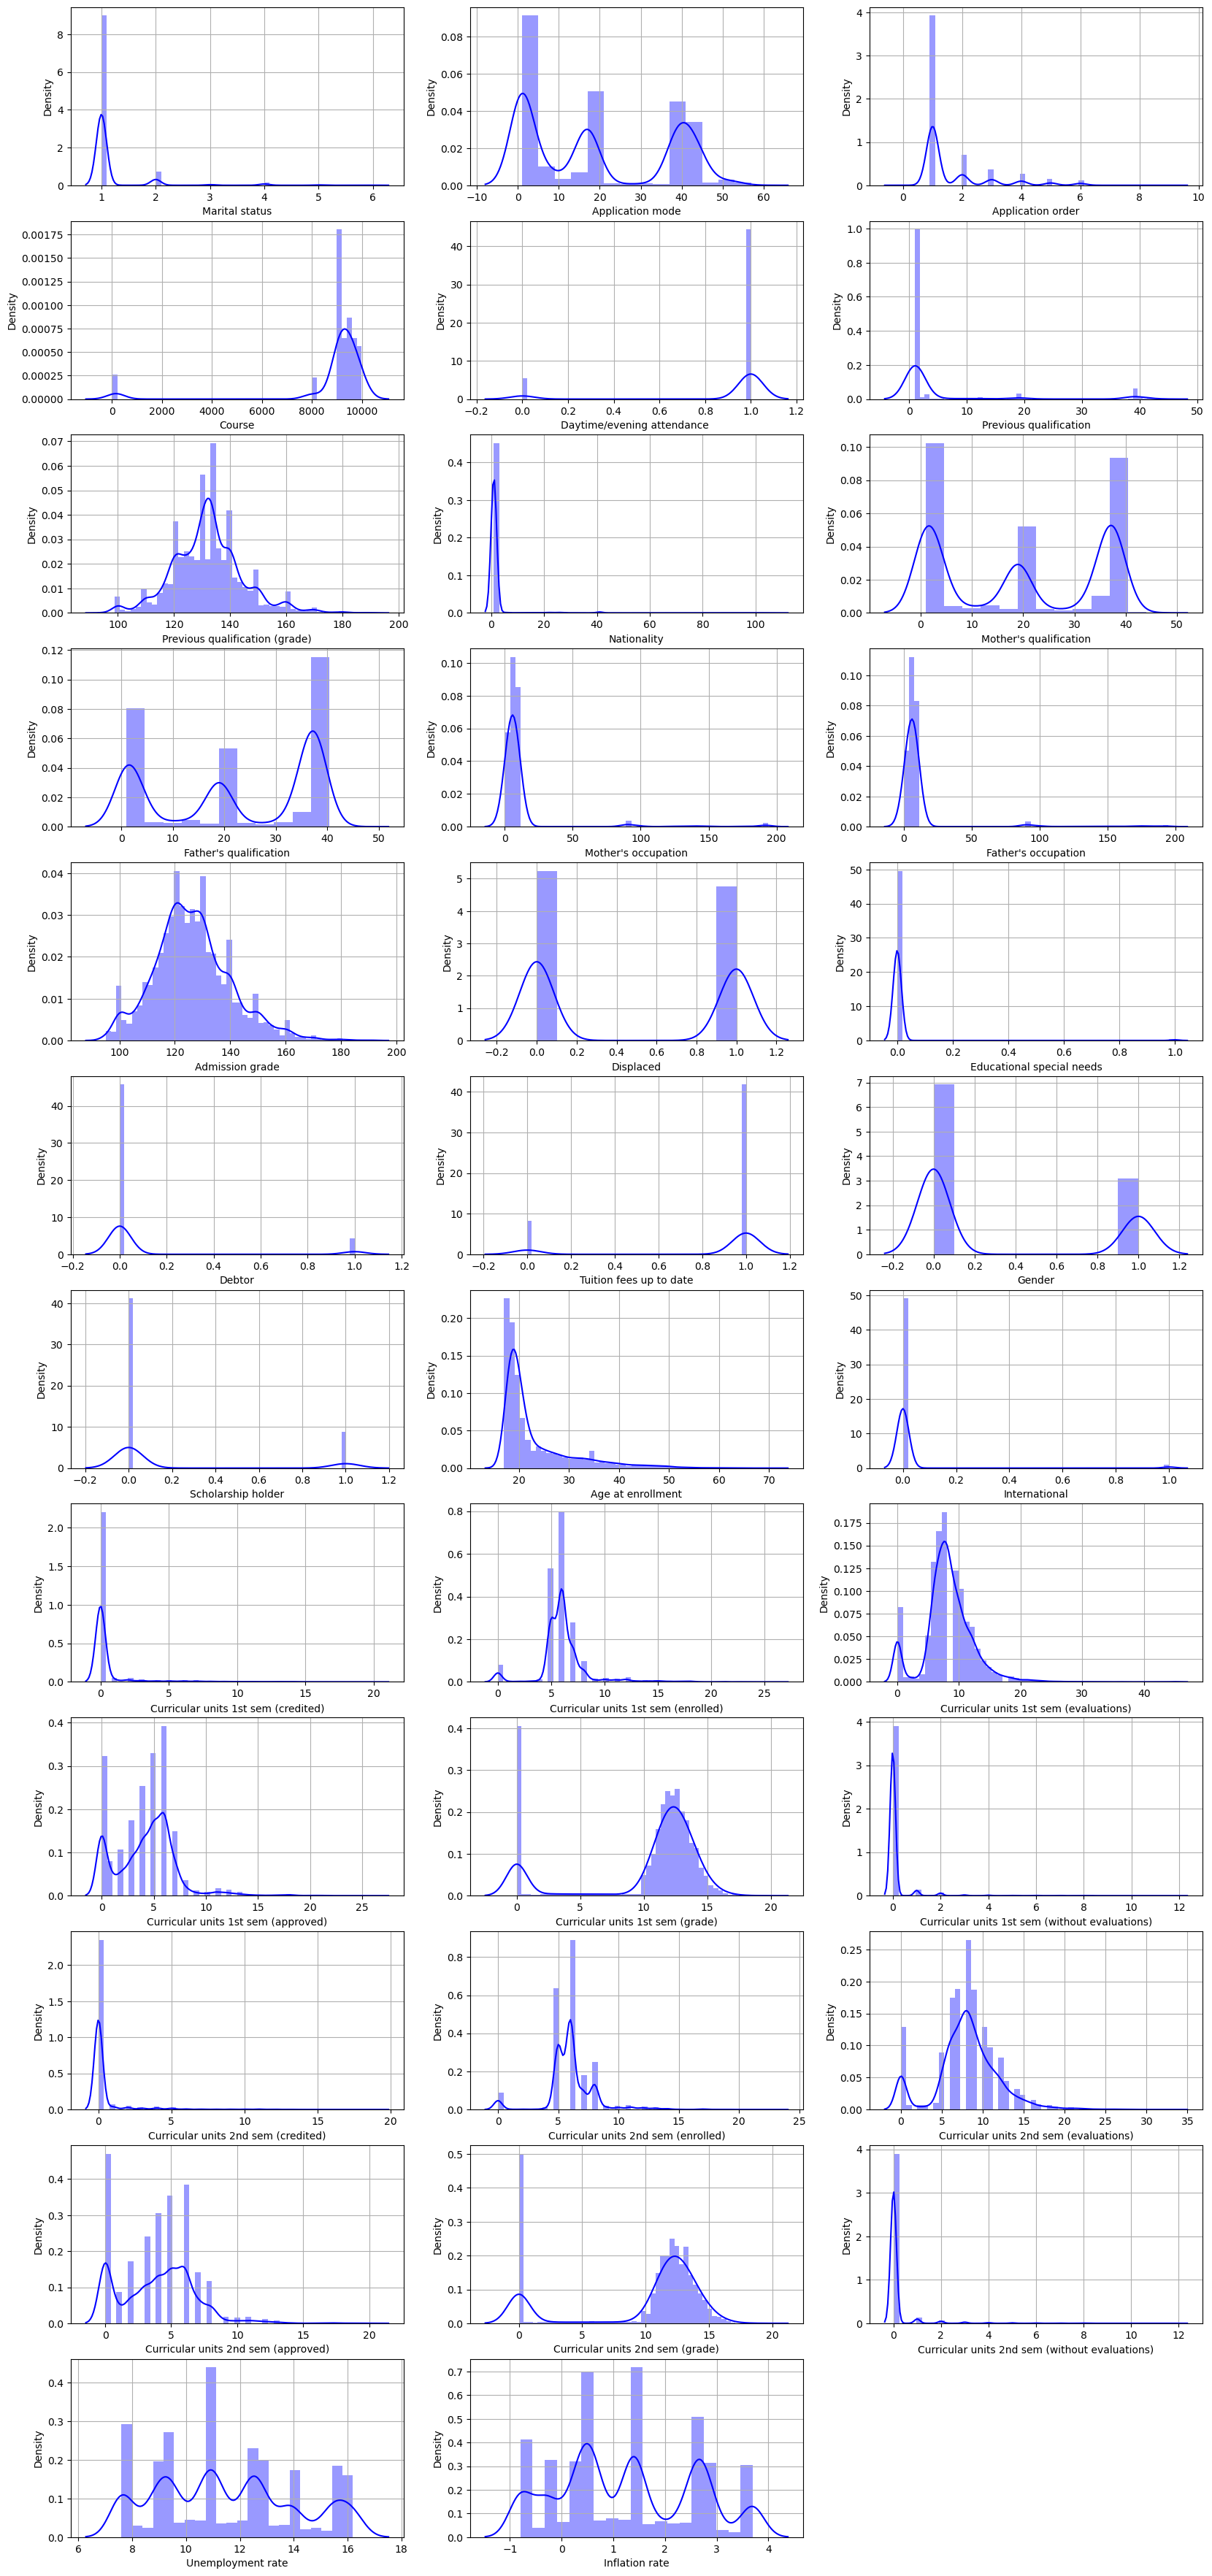

In [21]:
plt.figure(figsize=(20, 45))
for i in range(0, 35):
    plt.subplot(12, 3, i + 1)
    sns.distplot(resampled_df.iloc[:, i], color='blue')
    plt.grid()
#plt.savefig('resampled_df_distributions.png', bbox_inches='tight')


# Dropping the 'Enrolled' class. ##

In [22]:
resampled_df

resampled_df.drop(resampled_df[resampled_df['Target'] == 1].index, inplace = True)
resampled_df

resampled_df['Dropout'] = resampled_df['Target'].apply(lambda x: 1 if x==0 else 0)
resampled_df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
0,1,17,5,171,1,1,122.000000,1,19,12,...,0,0,0,0.000000,0,10.800000,1.400000,1.740000,0,1
1,1,15,1,9254,1,1,160.000000,1,1,3,...,6,6,6,13.666667,0,13.900000,-0.300000,0.790000,2,0
2,1,1,5,9070,1,1,122.000000,1,37,37,...,6,0,0,0.000000,0,10.800000,1.400000,1.740000,0,1
3,1,17,2,9773,1,1,122.000000,1,38,37,...,6,10,5,12.400000,0,9.400000,-0.800000,-3.120000,2,0
4,2,39,1,8014,0,1,100.000000,1,37,38,...,6,6,6,13.000000,0,13.900000,-0.300000,0.790000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5207,2,42,2,9991,0,1,117.765969,1,37,37,...,5,3,0,0.000000,0,8.739356,2.845743,-0.131274,0,1
5208,1,40,1,9250,1,39,135.396453,1,1,5,...,6,2,1,2.748938,0,15.673120,0.162553,-0.528276,0,1
5209,1,39,1,9991,0,16,135.723163,1,19,37,...,5,8,1,11.767175,0,11.053435,0.724173,1.976539,0,1
5210,1,39,2,9556,1,1,132.359174,1,5,5,...,7,11,0,0.000000,0,12.151494,1.125747,0.567026,0,1


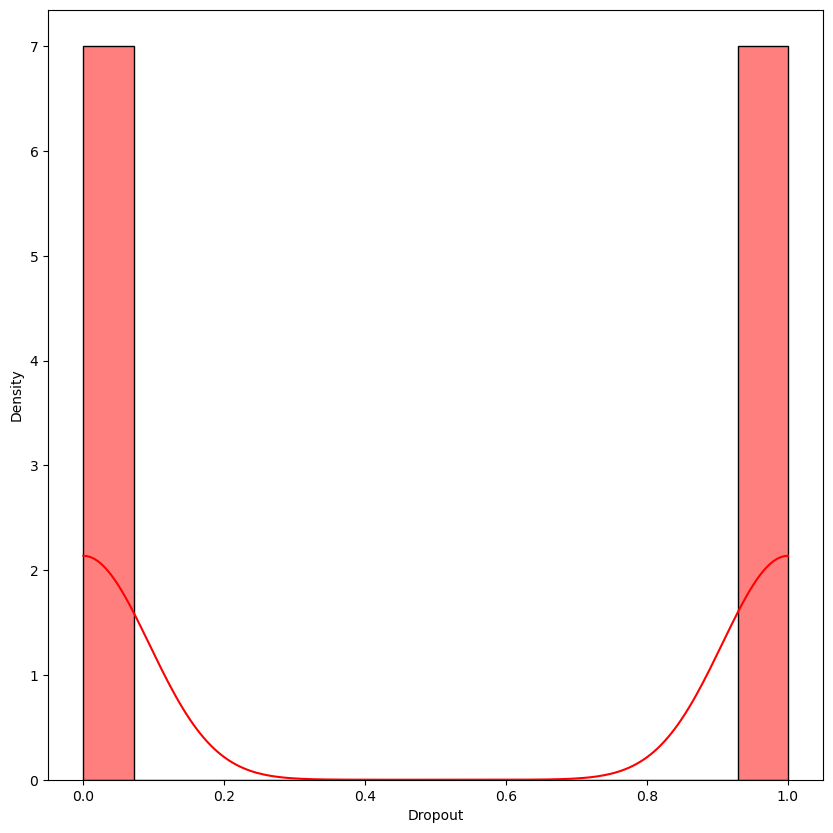

In [23]:
# Ensure inline plotting in Jupyter notebooks
%matplotlib inline


# Convert infinity values to NaN
resampled_df['Dropout'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values (optional, depending on your data handling needs)
resampled_df.dropna(subset=['Dropout'], inplace=True)

# Plotting
plt.figure(figsize=(10, 10))
sns.histplot(resampled_df['Dropout'], color="Red", kde=True, stat='density')
#plt.savefig('resampled_target_distribution_new.png', bbox_inches='tight')
plt.show()

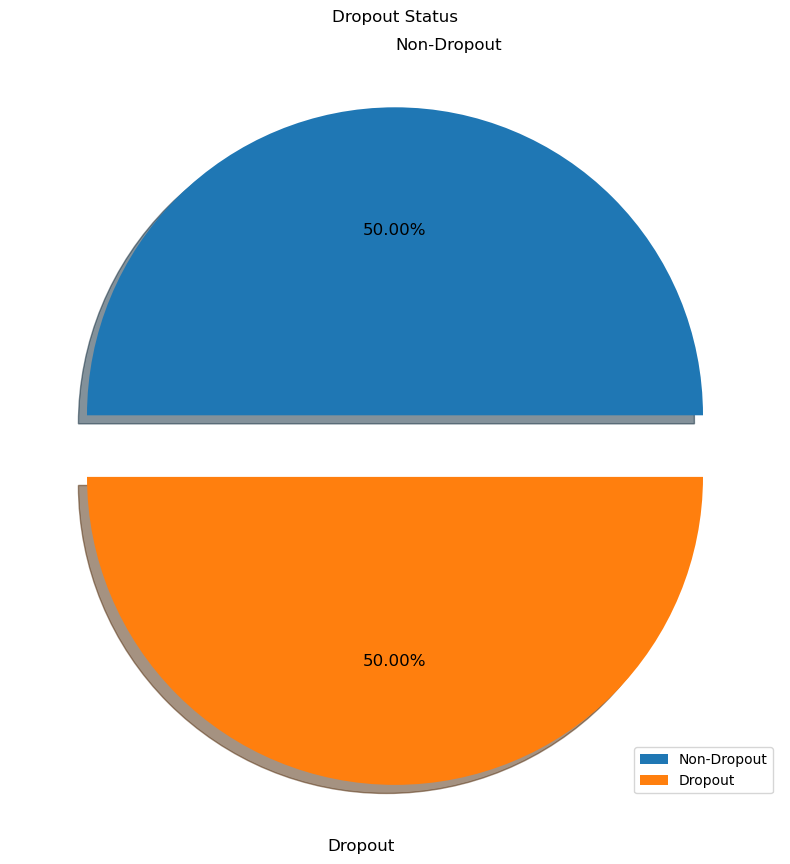

In [24]:
plt.figure(figsize=(10, 10))
plt.title("Dropout Status")
plt.pie(resampled_df['Dropout'].value_counts(),  
        labels = ['Non-Dropout', 'Dropout'], explode = (0.0, 0.2), autopct='%1.2f%%', 
        shadow = True,
       labeldistance=1.2,
       textprops={'fontsize': 12})
plt.legend( loc = 'lower right')
#plt.savefig('dropout_status_pie_chart.png', bbox_inches='tight')

# Train Test Split #

In [25]:
y = resampled_df['Dropout']
x = resampled_df.drop(['Target','Dropout'], axis=1)

In [26]:
if not isinstance(x, pd.DataFrame):
    x = pd.DataFrame(x)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)



x_test.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1357,1,39,1,9254,1,19,133.100000,1,19,1,...,0,0,5,5,0,0.000000,0,15.500000,2.800000,-4.060000
4903,1,42,1,9556,1,1,138.285976,1,37,37,...,6,0,7,8,0,0.964138,6,10.962832,1.597113,1.445188
4314,1,17,1,9119,1,1,132.000000,1,37,37,...,0,0,5,5,0,0.000000,0,7.600000,2.600000,0.320000
4404,2,39,1,9130,1,19,133.100000,1,2,1,...,0,0,6,9,2,10.500000,0,16.200000,0.300000,-0.920000
2256,1,7,1,33,1,40,120.000000,1,38,37,...,0,12,16,21,12,12.250000,1,11.100000,0.600000,2.020000


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [29]:
x_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
4987,1,17,3,9238,1,1,134.513255,1,1,3,...,0,0,6,7,5,15.888728,0,10.594507,0.183711,0.491626
1392,1,1,1,171,1,1,131.000000,1,19,19,...,0,0,0,0,0,0.000000,0,16.200000,0.300000,-0.920000
392,1,1,6,9773,1,1,141.000000,1,30,37,...,0,0,6,8,5,11.400000,0,7.600000,2.600000,0.320000
2653,2,39,2,9147,1,1,133.100000,1,37,37,...,1,0,5,5,0,0.000000,0,9.400000,-0.800000,-3.120000
1077,1,17,1,9254,1,1,158.000000,1,37,37,...,0,0,6,11,1,14.000000,0,7.600000,2.600000,0.320000


In [30]:
x_test.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
1357,1,39,1,9254,1,19,133.100000,1,19,1,...,0,0,5,5,0,0.000000,0,15.500000,2.800000,-4.060000
4903,1,42,1,9556,1,1,138.285976,1,37,37,...,6,0,7,8,0,0.964138,6,10.962832,1.597113,1.445188
4314,1,17,1,9119,1,1,132.000000,1,37,37,...,0,0,5,5,0,0.000000,0,7.600000,2.600000,0.320000
4404,2,39,1,9130,1,19,133.100000,1,2,1,...,0,0,6,9,2,10.500000,0,16.200000,0.300000,-0.920000
2256,1,7,1,33,1,40,120.000000,1,38,37,...,0,12,16,21,12,12.250000,1,11.100000,0.600000,2.020000


In [31]:
y_train.value_counts()

Dropout
1    1789
0    1745
Name: count, dtype: int64

In [32]:
y_test.value_counts()

Dropout
0    464
1    420
Name: count, dtype: int64

In [33]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance ', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd 

In [34]:
def evaluate_classifiers(train_x, train_y, test_x, test_y):
    # Define classifiers
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Decision Tree': DecisionTreeClassifier(),
        'Logistic Regression': LogisticRegression(),
        'SVC': SVC(random_state=42),
        'Random Forest': RandomForestClassifier(),
        'Gaussian Naive Bayes': GaussianNB(),
        'AdaBoost': AdaBoostClassifier(),
        'XGBoost': XGBClassifier()
    }
    # Create a DataFrame to store the results
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    
    # Loop through classifiers and evaluate each one
    for name, classifier in classifiers.items():
        classifier.fit(train_x, train_y)
        predictions = classifier.predict(test_x)
        
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        roc_auc = roc_auc_score(test_y, predictions)
        
        results.loc[name] = [accuracy, precision, recall, f1, roc_auc]
    
    return results


In [35]:
results_df = evaluate_classifiers(x_train,y_train,x_test,y_test)
print(results_df)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                      Accuracy  Precision    Recall  F1 Score   ROC AUC
KNN                   0.781674   0.765808  0.778571  0.772137  0.781527
Decision Tree         0.859729   0.849057  0.857143  0.853081  0.859606
Logistic Regression   0.872172   0.892583  0.830952  0.860666  0.870218
SVC                   0.475113   0.475113  1.000000  0.644172  0.500000
Random Forest         0.923077   0.946701  0.888095  0.916462  0.921418
Gaussian Naive Bayes  0.868778   0.906417  0.807143  0.853904  0.865856
AdaBoost              0.900452   0.904878  0.883333  0.893976  0.899641
XGBoost               0.916290   0.939086  0.880952  0.909091  0.914614


# Feature Selection #

In [36]:
print(type(x_train))

<class 'pandas.core.frame.DataFrame'>


In [37]:
x_train = pd.DataFrame(x_train, columns=x.columns)

In [38]:
x_train = pd.DataFrame(x_train, columns=x.columns)

In [39]:
#Correlation Matrix
corr = x_train.corr()
corr

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
Marital status,1.000000,0.257872,-0.128483,0.045858,-0.236748,0.070969,-0.033347,-0.001720,0.192975,0.140754,...,0.040603,0.069725,0.050871,0.039861,-0.046365,-0.062347,0.026363,0.000038,0.013336,-0.024766
Application mode,0.257872,1.000000,-0.304333,0.083345,-0.309774,0.415052,-0.065364,-0.009557,0.128630,0.107501,...,0.039795,0.210544,0.104813,0.140496,-0.124978,-0.141650,0.047599,0.105211,-0.020896,-0.023263
Application order,-0.128483,-0.304333,1.000000,0.034798,0.167710,-0.190255,-0.049422,-0.024341,-0.082758,-0.061772,...,-0.039716,-0.122801,0.041467,-0.035364,0.109018,0.080589,-0.029796,-0.096777,-0.006170,0.023548
Course,0.045858,0.083345,0.034798,1.000000,-0.044831,0.013877,-0.091166,-0.018772,0.014993,0.033419,...,0.031309,-0.058146,0.463822,0.300842,0.195429,0.316187,0.038858,0.005916,0.029504,0.013411
Daytime/evening attendance,-0.236748,-0.309774,0.167710,-0.044831,1.000000,-0.068090,0.064735,0.030420,-0.192377,-0.123198,...,0.038612,-0.104390,0.016187,0.014337,0.061187,0.056590,-0.004938,0.053081,-0.020827,-0.003843
Previous qualification,0.070969,0.415052,-0.190255,0.013877,-0.068090,1.000000,0.100927,-0.019607,-0.028735,0.013093,...,0.024659,0.140654,0.055720,0.111535,-0.016714,0.011683,0.022866,0.134785,-0.075880,0.065046
Previous qualification (grade),-0.033347,-0.065364,-0.049422,-0.091166,0.064735,0.100927,1.000000,0.035555,-0.085716,-0.048739,...,-0.019192,-0.026939,-0.040619,-0.068568,0.061324,0.065609,-0.029257,0.041661,0.013403,-0.044357
Nationality,-0.001720,-0.009557,-0.024341,-0.018772,0.030420,-0.019607,0.035555,1.000000,-0.019287,-0.055853,...,0.005679,-0.005662,-0.030520,-0.036571,-0.014969,-0.007828,-0.012408,-0.023751,0.000556,0.022157
Mother's qualification,0.192975,0.128630,-0.082758,0.014993,-0.192377,-0.028735,-0.085716,-0.019287,1.000000,0.569328,...,0.007718,0.041076,0.013380,0.029016,-0.047038,-0.040760,0.026893,-0.141285,0.042524,-0.068212
Father's qualification,0.140754,0.107501,-0.061772,0.033419,-0.123198,0.013093,-0.048739,-0.055853,0.569328,1.000000,...,-0.007687,0.049280,0.026690,0.022537,-0.007052,-0.009273,0.009386,-0.091569,0.052539,-0.049229


Correlation matrix exported as an image successfully!


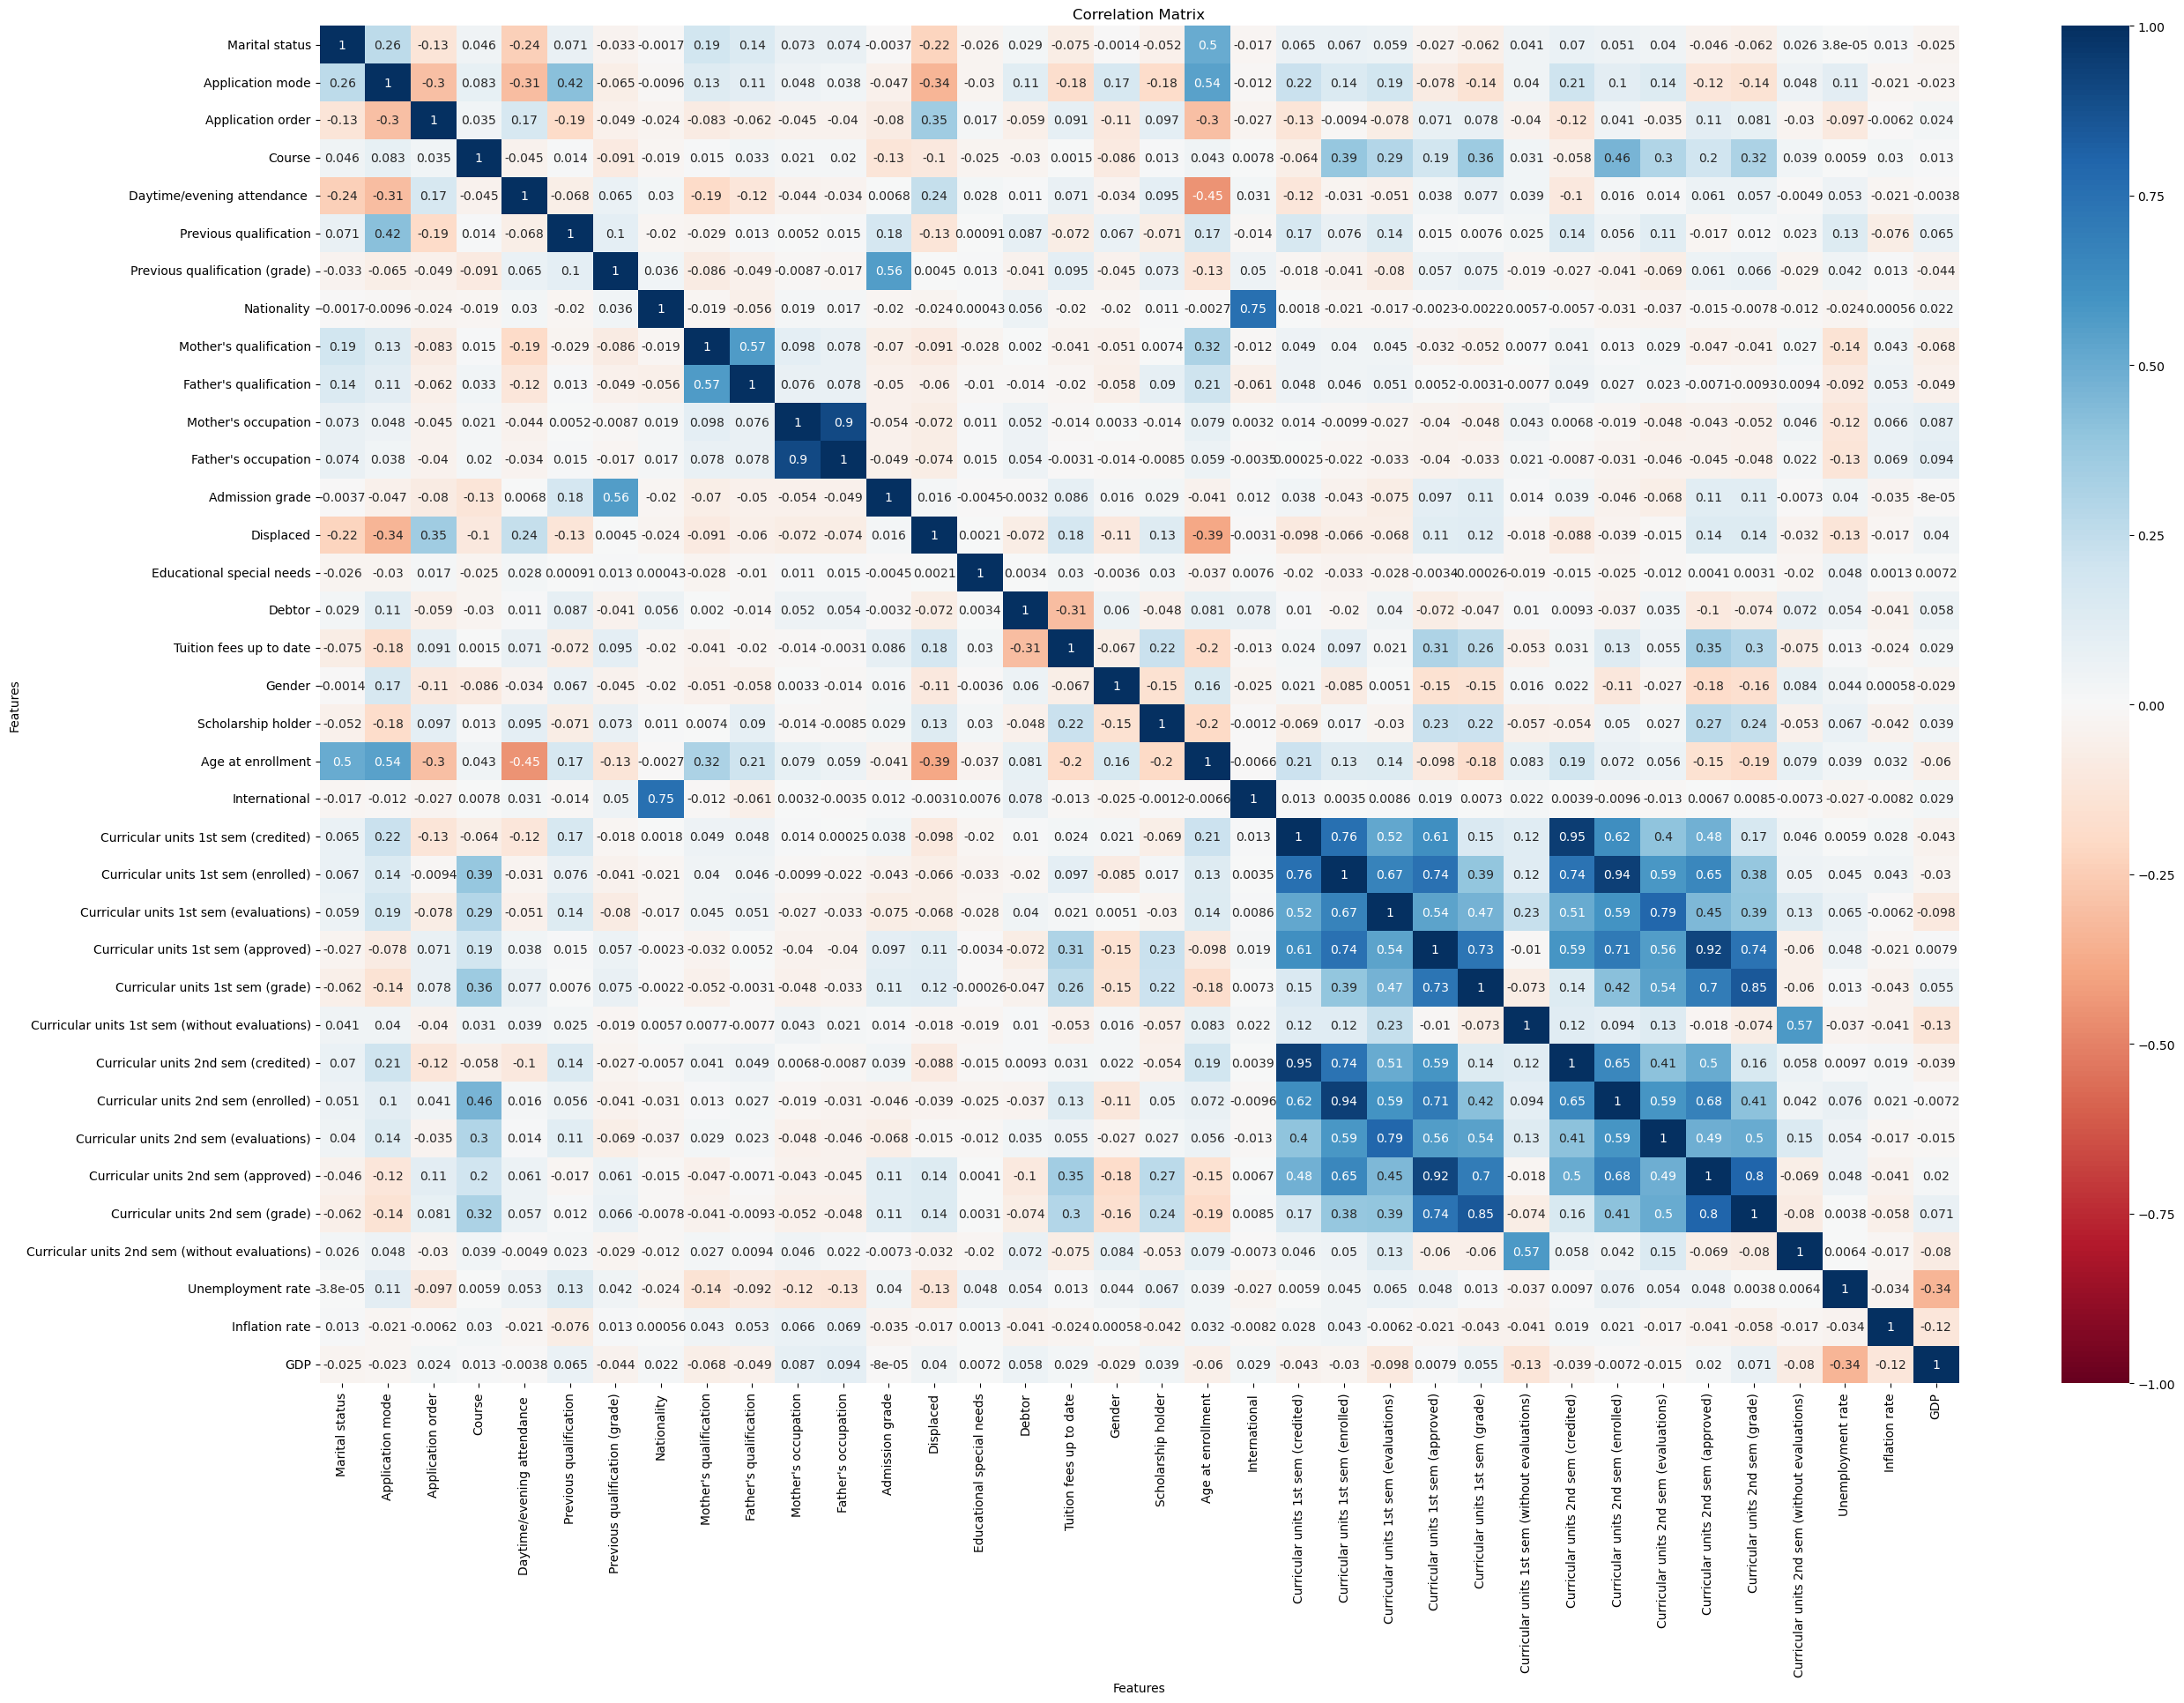

In [40]:
plt.figure(figsize=(30,20))
sns.heatmap(corr, cmap = "RdBu", vmin=-1, vmax=1, annot=True)

plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Save the plot as an image file
#plt.savefig('correlation_matrix.png', dpi=300)  

print("Correlation matrix exported as an image successfully!")

In [41]:
# setting Threshold 90% and checking which features have relation >90%

corr_pairs=[]
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i,j]>0.9:
            corr_pairs.append((corr.columns[i],corr.columns[j],corr.iloc[i,j]))
corr_pairs

[("Father's occupation", "Mother's occupation", 0.9010307544790421),
 ('Curricular units 2nd sem (credited)',
  'Curricular units 1st sem (credited)',
  0.9471136046237406),
 ('Curricular units 2nd sem (enrolled)',
  'Curricular units 1st sem (enrolled)',
  0.9395866606355096),
 ('Curricular units 2nd sem (approved)',
  'Curricular units 1st sem (approved)',
  0.9199362600247213)]

In [42]:
# Dropping Features
features_to_drop = []
for i,j,k in corr_pairs:
    features_to_drop.append(i)

features_to_drop = list(set(features_to_drop))
features_to_drop

['Curricular units 2nd sem (approved)',
 'Curricular units 2nd sem (credited)',
 "Father's occupation",
 'Curricular units 2nd sem (enrolled)']

In [43]:
# Dropping Features
x_train_selected = x_train.drop(features_to_drop, axis=1)
x_test_selected = x_test.drop(features_to_drop, axis=1)
x_train_selected

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
4987,1,17,3,9238,1,1,134.513255,1,1,3,...,6,5,15.087592,0,7,15.888728,0,10.594507,0.183711,0.491626
1392,1,1,1,171,1,1,131.000000,1,19,19,...,0,0,0.000000,0,0,0.000000,0,16.200000,0.300000,-0.920000
392,1,1,6,9773,1,1,141.000000,1,30,37,...,8,5,13.000000,0,8,11.400000,0,7.600000,2.600000,0.320000
2653,2,39,2,9147,1,1,133.100000,1,37,37,...,14,0,0.000000,1,5,0.000000,0,9.400000,-0.800000,-3.120000
1077,1,17,1,9254,1,1,158.000000,1,37,37,...,8,4,12.500000,0,11,14.000000,0,7.600000,2.600000,0.320000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4201,1,17,1,8014,0,1,125.000000,1,37,37,...,6,6,12.166667,0,7,11.666667,0,10.800000,1.400000,1.740000
569,1,39,1,9003,1,1,120.000000,1,3,4,...,10,5,13.000000,0,13,11.500000,0,16.200000,0.300000,-0.920000
3772,1,1,4,9238,1,1,127.000000,1,1,38,...,6,6,13.500000,0,7,13.428571,0,11.100000,0.600000,2.020000
4566,1,1,2,9773,1,1,130.196156,1,33,22,...,9,4,12.168935,0,13,10.790552,0,7.600000,2.600000,0.320000


# Feature Scaling #

In [44]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns)

In [47]:
x_train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.302482,-0.142681,1.029518,0.186436,0.367749,-0.364991,0.161981,-0.117026,-1.250549,-1.305895,...,-0.192571,-0.276654,-0.070132,-0.146646,0.319917,1.155442,-0.198996,-0.380356,-0.787617,0.238583
1,-0.302482,-1.066931,-0.545852,-4.162387,0.367749,-0.364991,-0.113825,-0.117026,-0.084111,-0.249597,...,-0.192571,-0.276654,-2.818893,-1.889914,-1.252526,-1.628882,-0.198996,1.755007,-0.701309,-0.403792
2,-0.302482,-1.066931,3.392574,0.443039,0.367749,-0.364991,0.671217,-0.117026,0.628713,0.938739,...,-0.192571,-0.276654,-0.070132,0.102392,0.319917,0.368842,-0.198996,-1.521086,1.005729,0.160483
3,1.357411,1.128162,0.241833,0.142789,0.367749,-0.364991,0.051034,-0.117026,1.082328,0.938739,...,1.343652,-0.276654,-0.528259,-0.644723,-1.252526,-1.628882,-0.198996,-0.835393,-1.517718,-1.404924
4,-0.302482,-0.142681,-0.545852,0.194110,0.367749,-0.364991,2.005788,-0.117026,1.082328,0.938739,...,-0.192571,-0.276654,-0.070132,0.849506,-0.938037,0.824464,-0.198996,-1.521086,1.005729,0.160483


In [48]:
x_test.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.295782,1.172100,-0.539608,0.210528,0.363156,1.462780,0.009017,-0.153848,-0.022316,-1.334710,...,-0.183659,-0.277973,-0.522584,-0.614982,-1.280420,-1.657746,-0.183326,1.492335,1.140852,-1.889430
1,-0.295782,1.345039,-0.539608,0.353192,0.363156,-0.353368,0.408650,-0.153848,1.123166,0.993625,...,7.800997,-0.277973,0.357348,0.128717,-1.280420,-1.488444,7.413252,-0.246016,0.255452,0.654799
2,-0.295782,-0.096121,-0.539608,0.146755,0.363156,-0.353368,-0.075749,-0.153848,1.123166,0.993625,...,-0.183659,-0.277973,-0.522584,-0.614982,-1.280420,-1.657746,-0.183326,-1.534437,0.993640,0.134792
3,1.470918,1.172100,-0.539608,0.151951,0.363156,1.462780,0.009017,-0.153848,-1.104161,-1.334710,...,-0.183659,-0.277973,-0.082618,0.376617,-0.660715,0.186048,-0.183326,1.760530,-0.699303,-0.438275
4,-0.295782,-0.672585,-0.539608,-4.145442,0.363156,3.581619,-1.000472,-0.153848,1.186804,0.993625,...,-0.183659,5.549581,4.317039,3.351414,2.437810,0.493347,1.082770,-0.193462,-0.478484,0.920449


In [49]:
def evaluate_classifiers(train_x, train_y, test_x, test_y):
    # Define classifiers
    classifiers = {
        'KNN': KNeighborsClassifier(),
        'Logistic Regression': LogisticRegression(),
        'SVC': SVC(random_state=42)
    }
    # Create a DataFrame to store the results
    results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
    
    # Loop through classifiers and evaluate each one
    for name, classifier in classifiers.items():
        classifier.fit(train_x, train_y)
        predictions = classifier.predict(test_x)
        
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        roc_auc = roc_auc_score(test_y, predictions)
        
        results.loc[name] = [accuracy, precision, recall, f1, roc_auc]
    
    return results

In [50]:
results_df = evaluate_classifiers(x_train,y_train,x_test,y_test)
print(results_df)

                     Accuracy  Precision    Recall  F1 Score   ROC AUC
KNN                  0.886878   0.916667  0.838095  0.875622  0.884565
Logistic Regression  0.912896   0.909308  0.907143  0.908224  0.912623
SVC                  0.915158   0.936709  0.880952  0.907975  0.913537


In [51]:
!pip install scikit-plot

# KNN Classifier #

Test Accuracy: 0.89
Training Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       464
           1       0.92      0.84      0.88       420

    accuracy                           0.89       884
   macro avg       0.89      0.88      0.89       884
weighted avg       0.89      0.89      0.89       884



Text(0, 0.5, 'True Label')

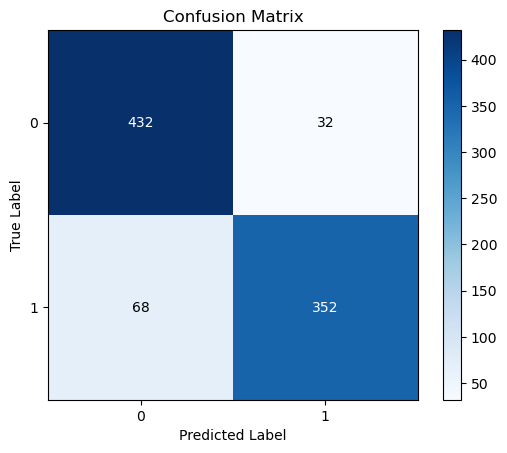

In [52]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# Performance measure
print('Test Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Training Accuracy:', '{:.2f}'.format(accuracy_score(y_train, knn.predict(x_train))))

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.savefig('confusion_matrix_knn.png')

In [53]:
k = range(10, 30)
k

range(10, 30)

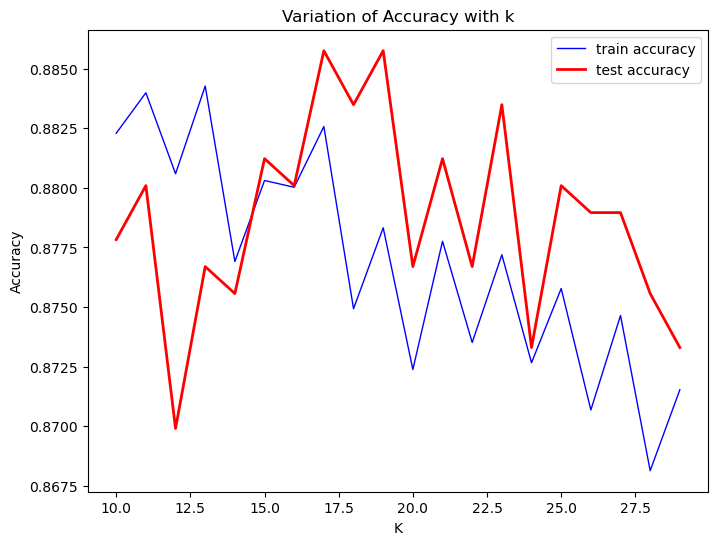

In [54]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

train_acc = []
test_acc = []
neighbors = []

for i in k:
    neighbors.append(i)
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(x_train, y_train)
    train_acc.append(accuracy_score(y_train, model.predict(x_train)))
    test_acc.append(accuracy_score(y_test, model.predict(x_test)))

plt.figure(figsize = (8,6))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Variation of Accuracy with k')
plt.plot(neighbors, train_acc, color = 'blue', linewidth = 1,
         label = 'train accuracy');

plt.plot(neighbors, test_acc, color = 'red', linewidth = 2,
         label = 'test accuracy')
plt.legend()
#save_fig('Accuracy against k')
plt.show();

# Testing with different values of K #

In [55]:
k = 28

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print('Train Accuracy', accuracy_score(y_train, knn.predict(x_train)))
print('Test Accuracy', accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

Train Accuracy 0.8681380871533673
Test Accuracy 0.8755656108597285
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       464
           1       0.95      0.78      0.86       420

    accuracy                           0.88       884
   macro avg       0.89      0.87      0.87       884
weighted avg       0.89      0.88      0.87       884



In [56]:
k = 7

knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print('Train Accuracy', accuracy_score(y_train, knn.predict(x_train)))
print('Test Accuracy', accuracy_score(y_test, pred))

print(classification_report(y_test, pred))

Train Accuracy 0.9037917374080362
Test Accuracy 0.8880090497737556
              precision    recall  f1-score   support

           0       0.86      0.93      0.90       464
           1       0.92      0.84      0.88       420

    accuracy                           0.89       884
   macro avg       0.89      0.89      0.89       884
weighted avg       0.89      0.89      0.89       884



# Decision Tree Classifier #

Test Accuracy: 0.83
Training Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.88      0.78      0.83       464
           1       0.78      0.88      0.83       420

    accuracy                           0.83       884
   macro avg       0.83      0.83      0.83       884
weighted avg       0.83      0.83      0.83       884



Text(0, 0.5, 'True Label')

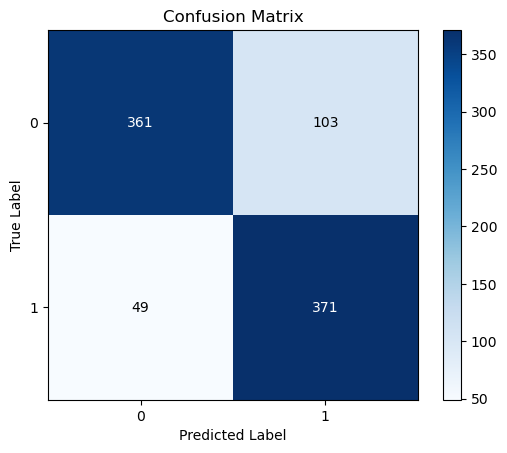

In [57]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

# Performance measure
print('Test Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Training Accuracy:', '{:.2f}'.format(accuracy_score(y_train, dt.predict(x_train))))

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.savefig('confusion_matrix_decision_tree.png')

# Decision Tree Hyper Parameter Tuning #

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [59]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier()

# Define the hyperparameters distribution
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

# Perform randomized search
random_search = RandomizedSearchCV(estimator=dt,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   verbose=3,
                                   n_jobs=-1,
                                   random_state=42)

# Fit the randomized search to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 10}


In [60]:
print("Best Score", random_search.best_score_)

Best Score 0.900393475203449


In [61]:
y_pred = random_search.predict(x_test)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       464
           1       0.95      0.82      0.88       420

    accuracy                           0.90       884
   macro avg       0.90      0.89      0.89       884
weighted avg       0.90      0.90      0.90       884



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

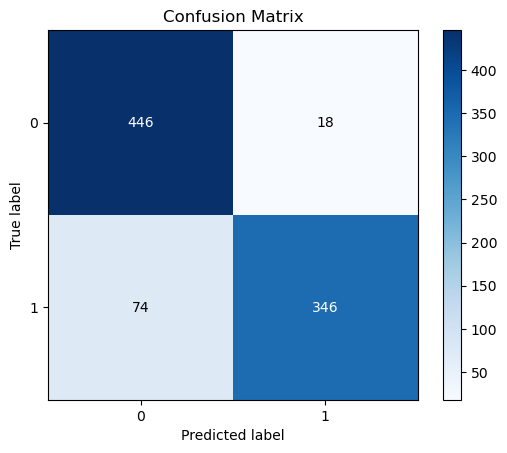

In [62]:
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test,y_pred)

# Running a Decision Tree #

In [63]:
from sklearn.tree import plot_tree

def draw_decision_tree(decision_tree, feature_names=None, class_names=None):
    plt.figure(figsize=(20, 10))
    plot_tree(decision_tree, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()
   

In [64]:
feature_names = [str(name) for name in x_train.columns]
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [65]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
from sklearn.tree import export_graphviz

export_graphviz(
        dt,
        out_file=str(IMAGES_PATH / "decision_tree.dot"), 
        feature_names=x_train.columns,
        class_names=['0', '1'],
        rounded=True,
        filled=True
    )

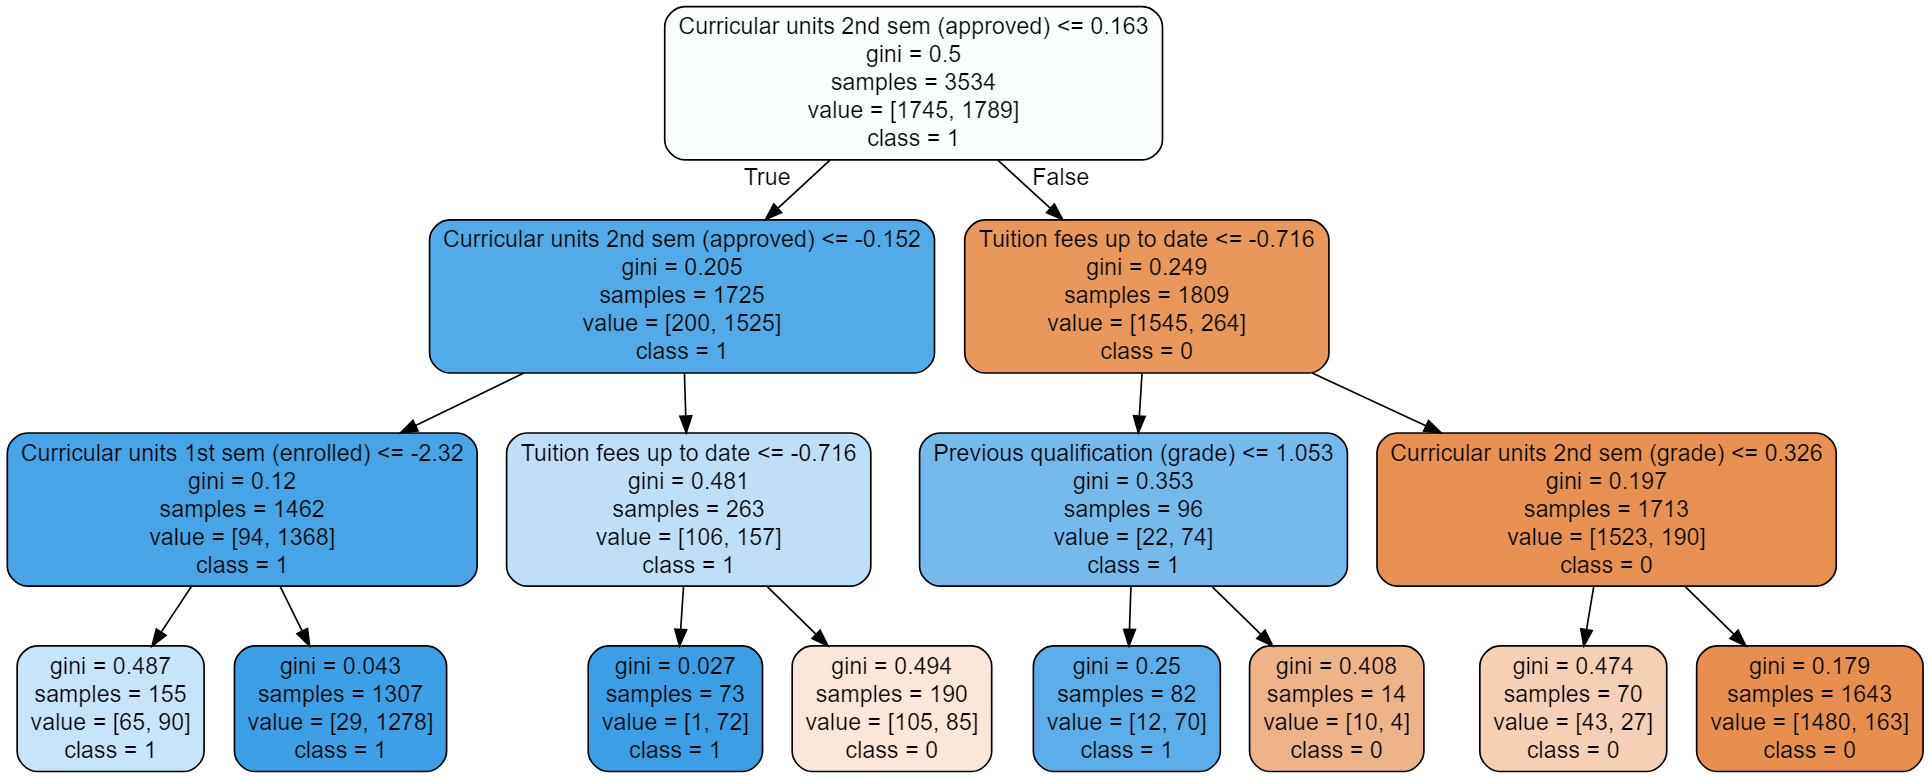

In [66]:
from IPython import display
display.Image(IMAGES_PATH / "C:\\Users\\ASUS\\Desktop\\445 Project\\Figures\\graphviz.png")

# Random Forest Classifier #

Test Accuracy: 0.91
Training Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       464
           1       0.92      0.88      0.90       420

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

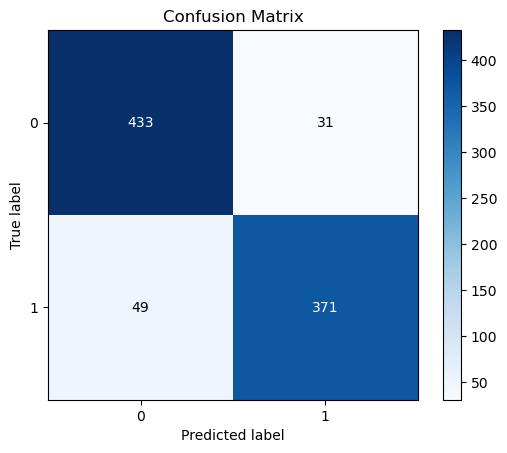

In [67]:
rf = RandomForestClassifier(random_state = 42)

rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

# Performance measure
print('Test Accuracy:','{:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Training Accuracy:','{:.2f}'.format(accuracy_score(y_train,rf.predict(x_train))))

print(classification_report(y_test,y_pred))

skplt.metrics.plot_confusion_matrix(y_test,y_pred)

# Random Forest Hyper Parameter Tuning #

In [68]:
from scipy.stats import randint

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Define the hyperparameters distribution
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': randint(1, 20),  # Maximum number of levels in the tree
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Perform randomized search
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   verbose=3,
                                   n_jobs=-1,
                                   random_state=42)

# Fit the randomized search to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'bootstrap': False, 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 790}


In [69]:
print("Best Score", random_search.best_score_)

Best Score 0.9105777514214392


In [70]:
y_pred = random_search.predict(x_test)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       464
           1       0.93      0.88      0.91       420

    accuracy                           0.92       884
   macro avg       0.92      0.91      0.91       884
weighted avg       0.92      0.92      0.91       884

Test Accuracy: 0.92
Training Accuracy: 1.00


Text(0, 0.5, 'True Label')

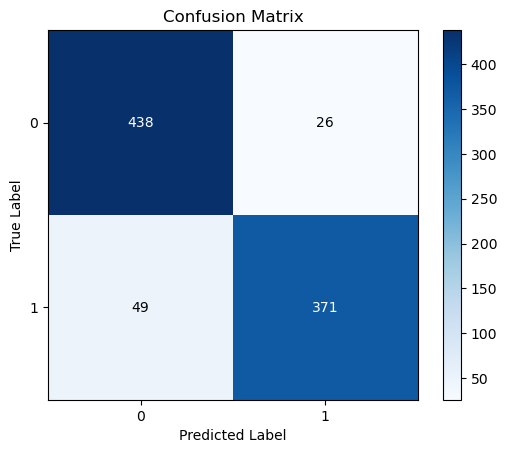

In [71]:
print(classification_report(y_test,y_pred))
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
rf.fit(x_train, y_train)
# Performance measure
print('Test Accuracy:','{:.2f}'.format(accuracy_score(y_test,y_pred)))
print('Training Accuracy:','{:.2f}'.format(accuracy_score(y_train,rf.predict(x_train))))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.savefig('confusion_matrix_random_forest.png')

# Logistic Regression #

Test Accuracy: 0.91
Training Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       464
           1       0.91      0.91      0.91       420

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

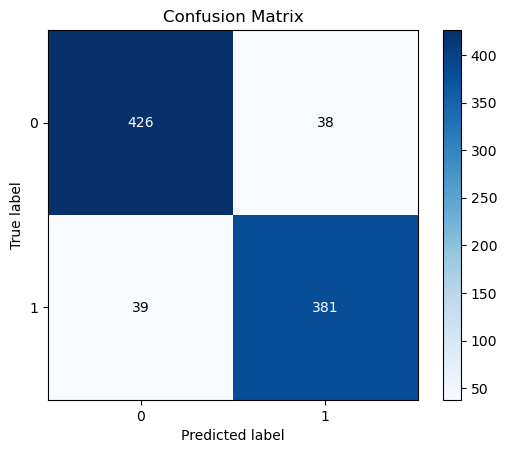

In [72]:
lr = LogisticRegression(random_state=42, max_iter=1000)  
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# Performance measure
print('Test Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Training Accuracy:', '{:.2f}'.format(accuracy_score(y_train, lr.predict(x_train))))

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

# LR Hyper Parameter Tuning #

In [73]:
from scipy.stats import uniform, randint

# Initialize the Logistic Regression classifier
lr = LogisticRegression()



# Define the hyperparameters distribution
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(loc=0, scale=4),  # Inverse of regularization strength
    'solver': ['liblinear', 'saga', 'newton-cg', 'lbfgs'],  # Add 'sag' if using a smaller dataset
    'max_iter': randint(50, 300),
    'l1_ratio': uniform(0, 1)  # Only used if penalty is 'elasticnet'
}

# Perform randomized search
random_search = RandomizedSearchCV(estimator=lr,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   verbose=3,
                                   n_jobs=-1,
                                   random_state=42)

# Fit the randomized search to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
185 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logi

Best Parameters:  {'C': 1.9664635004673294, 'l1_ratio': 0.4734717707805657, 'max_iter': 82, 'penalty': 'l2', 'solver': 'saga'}


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [74]:
print("Best Score", random_search.best_score_)

Best Score 0.9136918952923218


In [75]:
y_pred = random_search.predict(x_test)

Test Accuracy: 0.91
Training Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       464
           1       0.91      0.91      0.91       420

    accuracy                           0.91       884
   macro avg       0.91      0.91      0.91       884
weighted avg       0.91      0.91      0.91       884



Text(0, 0.5, 'True Label')

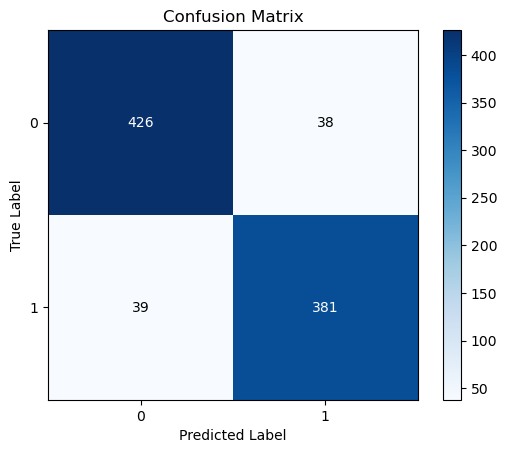

In [76]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred_lr = model_lr.predict(x_test)
lr.fit(x_train, y_train)
# Performance measure
print('Test Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Training Accuracy:', '{:.2f}'.format(accuracy_score(y_train, lr.predict(x_train))))
print(classification_report(y_test,y_pred_lr))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_lr)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.savefig('confusion_matrix_logistic_regression.png')

# Gaussian Naive Bayes Classifier #

Test Accuracy: 0.87
Training Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       464
           1       0.90      0.81      0.85       420

    accuracy                           0.87       884
   macro avg       0.87      0.87      0.87       884
weighted avg       0.87      0.87      0.87       884



Text(0, 0.5, 'True Label')

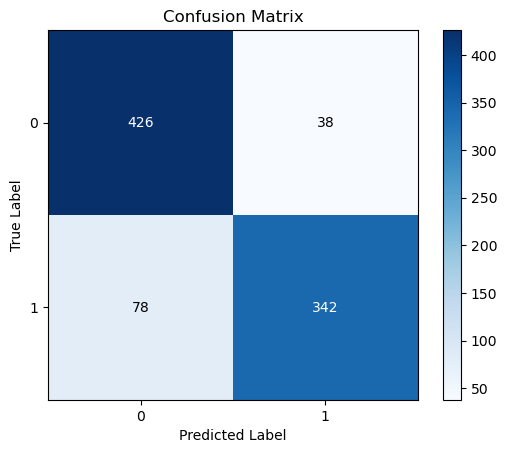

In [77]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)

# Performance measure
print('Test Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Training Accuracy:', '{:.2f}'.format(accuracy_score(y_train, nb.predict(x_train))))

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.savefig('confusion_matrix_gaussian_nb.png')

# Support Vector Machine (SVM) #

In [78]:
from scipy.stats import uniform, randint

# Initialize the SVC classifier
svc = SVC()

# Define the hyperparameters distribution
param_dist = {
    'C': uniform(loc=0.1, scale=10),  
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': randint(1, 5),  
    'gamma': ['scale', 'auto'], 
    'coef0': uniform(0, 1),  
    'tol': uniform(1e-4, 1e-2),  
    'max_iter': randint(100, 1000)  
}

# Perform randomized search
random_search = RandomizedSearchCV(estimator=svc,
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=5,
                                   verbose=3,
                                   n_jobs=-1,
                                   random_state=42)

# Fit the randomized search to the data
random_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Parameters: ", random_search.best_params_)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'C': 4.048815181755697, 'coef0': 0.2934881747180381, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': 692, 'tol': 0.0072134195274865}


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=692).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [79]:
print("Best Score", random_search.best_score_)

Best Score 0.9128440403732805


In [80]:
y_pred = random_search.predict(x_test)

Test Accuracy: 0.92
Training Accuracy: 0.94
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       464
           1       0.94      0.88      0.91       420

    accuracy                           0.92       884
   macro avg       0.92      0.91      0.91       884
weighted avg       0.92      0.92      0.91       884



Text(0, 0.5, 'True Label')

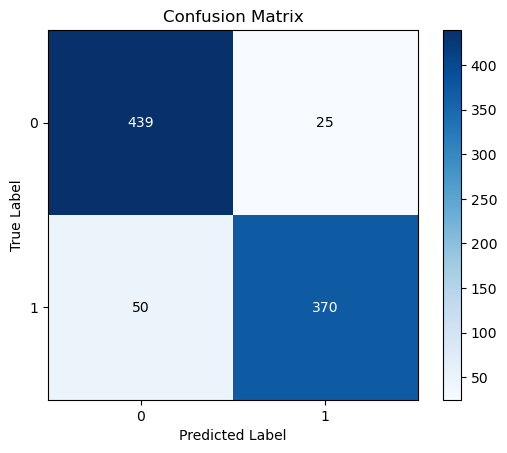

In [81]:
svc = SVC(random_state=42)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

# Performance measure
print('Test Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Training Accuracy:', '{:.2f}'.format(accuracy_score(y_train, svc.predict(x_train))))

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.savefig('confusion_matrix_svc.png')

# AdaBoost Classifier #

Test Accuracy: 0.90
Training Accuracy: 0.92
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       464
           1       0.91      0.87      0.89       420

    accuracy                           0.90       884
   macro avg       0.90      0.89      0.90       884
weighted avg       0.90      0.90      0.90       884



Text(0, 0.5, 'True Label')

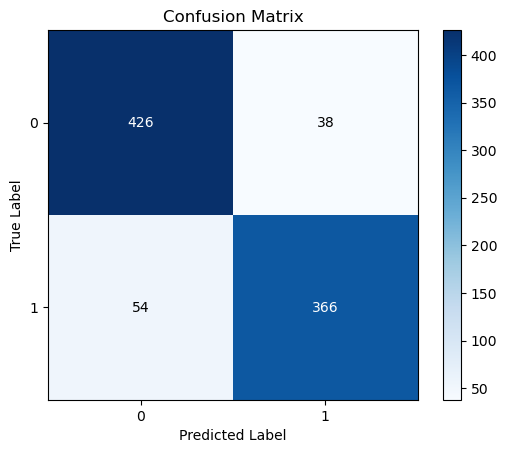

In [82]:
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

# Performance measure
print('Test Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Training Accuracy:', '{:.2f}'.format(accuracy_score(y_train, ada.predict(x_train))))

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.savefig('confusion_matrix_adaboost.png')

# XGBoost Classifier #

Test Accuracy: 0.56
Training Accuracy: 1.00
              precision    recall  f1-score   support

           0       0.98      0.17      0.29       464
           1       0.52      1.00      0.68       420

    accuracy                           0.56       884
   macro avg       0.75      0.58      0.49       884
weighted avg       0.76      0.56      0.48       884



Text(0, 0.5, 'True Label')

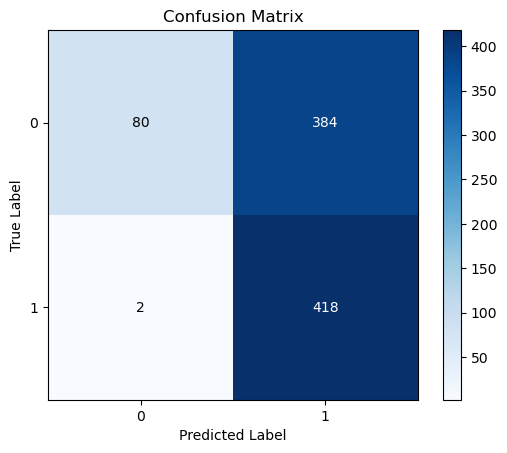

In [83]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

# Performance measure
print('Test Accuracy:', '{:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Training Accuracy:', '{:.2f}'.format(accuracy_score(y_train, xgb.predict(x_train))))

# Classification report
print(classification_report(y_test, y_pred))

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
#plt.savefig('confusion_matrix_xgboost.png')

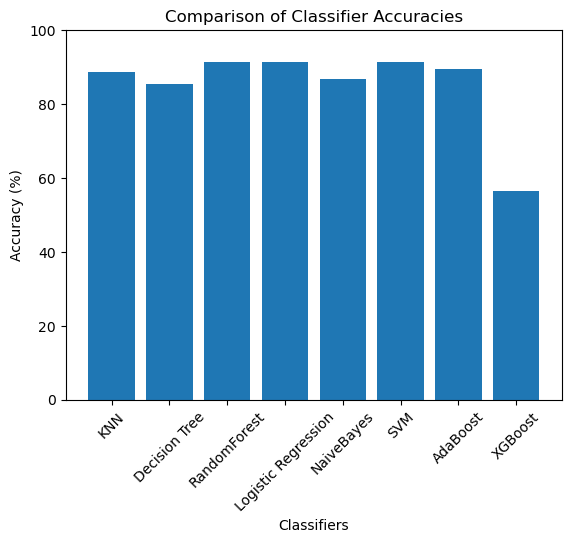

In [84]:
# Train and predict with each model

classifiers = ["KNN","Decision Tree", "RandomForest", "Logistic Regression", "NaiveBayes", "SVM", "AdaBoost", "XGBoost"]
models=[KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),GaussianNB(),
        SVC(C=0.1,kernel='linear'),
        AdaBoostClassifier(),XGBClassifier()]
predictions = []
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    predictions.append(y_pred)

# Calculate accuracy for each model
accuracies = [accuracy_score(y_test, pred) * 100 for pred in predictions]

# Plot the results
plt.bar(classifiers, accuracies)
plt.xlabel('Classifiers')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Classifier Accuracies')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()


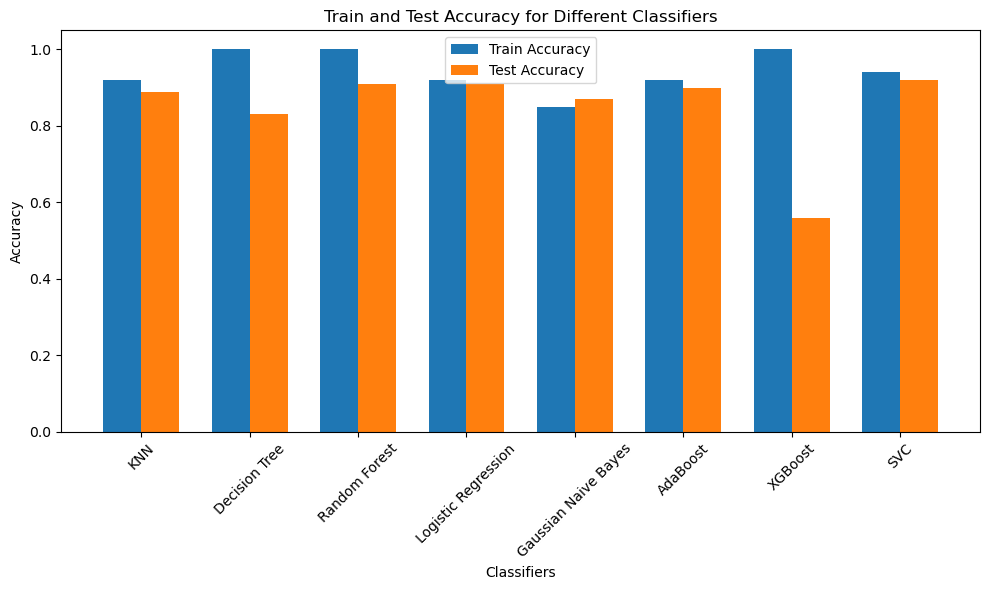

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Sample train and test accuracy values
train_accuracy = {'KNN': 0.92, 'Decision Tree': 1.00, 'Random Forest': 1.00, 'Logistic Regression': 0.92,'Gaussian Naive Bayes': 0.85, 'AdaBoost': 0.92, 'XGBoost': 1.00, 'SVC': 0.94}
test_accuracy = {'KNN': 0.89, 'Decision Tree': 0.83, 'Random Forest': 0.91, 'Logistic Regression': 0.91,'Gaussian Naive Bayes': 0.87, 'AdaBoost': 0.90, 'XGBoost': 0.56, 'SVC': 0.92}

classifiers = list(train_accuracy.keys())
train_acc_values = list(train_accuracy.values())
test_acc_values = list(test_accuracy.values())

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(classifiers))

train_bars = ax.bar(index, train_acc_values, bar_width, label='Train Accuracy')
test_bars = ax.bar(index + bar_width, test_acc_values, bar_width, label='Test Accuracy')

ax.set_xlabel('Classifiers')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Test Accuracy for Different Classifiers')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(classifiers, rotation=45)
ax.legend()

plt.tight_layout()
#plt.savefig('classifier_accuracy.png')
plt.show()
